# Results visualization

The central idea of this notebook is to visualize and evaluate our results based on data science concepts

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Perf behavior

In [13]:
data_path = '../../results/S1BF0.out.csv'
df = pd.read_csv(data_path)

In [14]:
cpu_cycles = df['cpu-cycles']
instructions = df['instructions']
cache_references = df['cache-references']
cache_misses = df['cache-misses']
branch_instructions = df['branch-instructions']

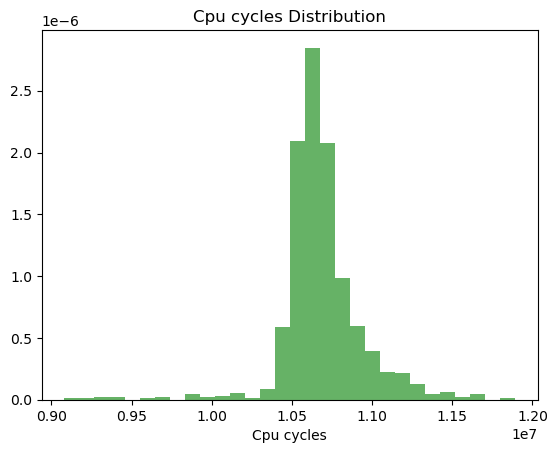

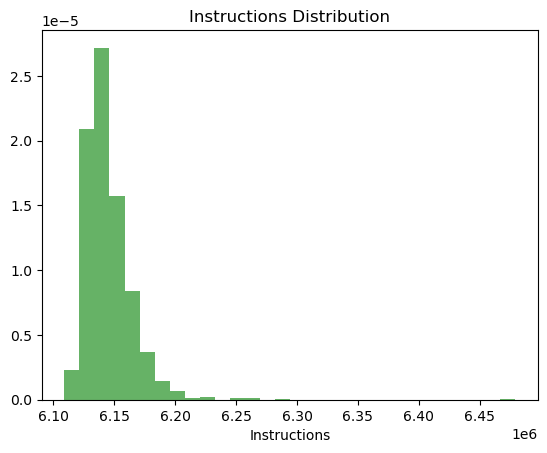

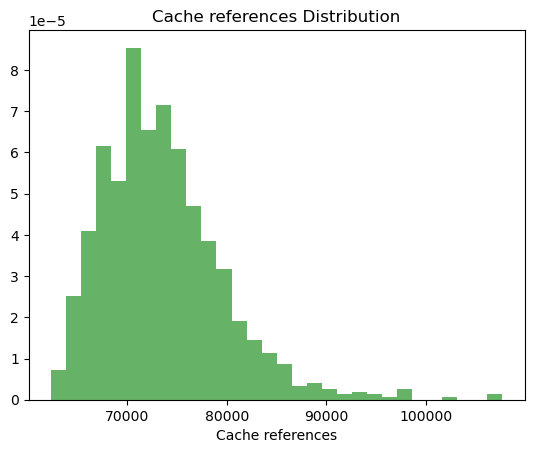

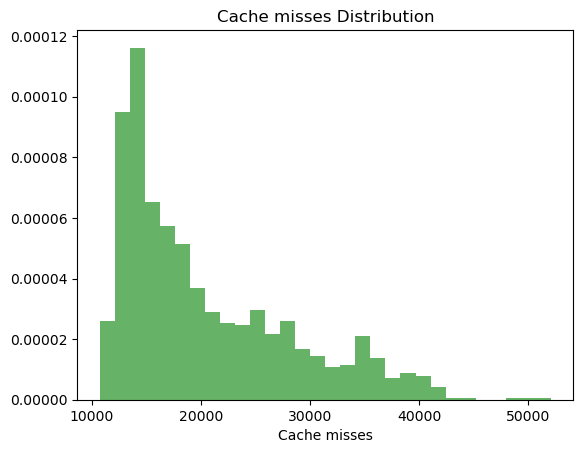

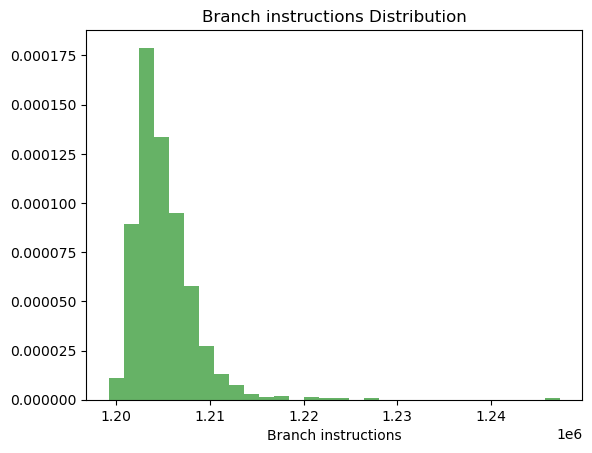

In [20]:
columns_to_plot = ['cpu-cycles', 'instructions', 'cache-references', 'cache-misses', 'branch-instructions']

# Plot histogram of cpu_cycles
for col in columns_to_plot:
    plt.figure()
    plt.hist(df[col], bins=30, density=True, alpha=0.6, color='g')
    plt.title(f"{col.replace('-', ' ').capitalize()} Distribution")
    plt.xlabel(col.replace('-', ' ').capitalize())
    plt.show()


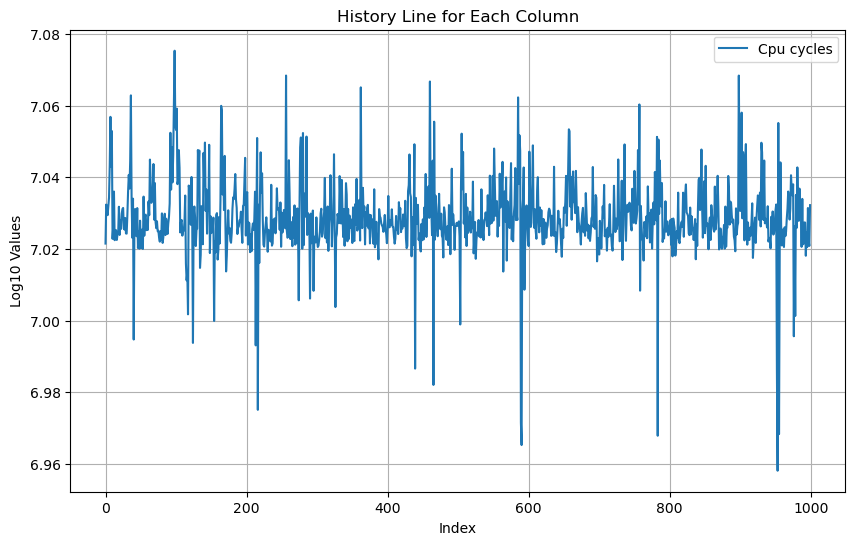

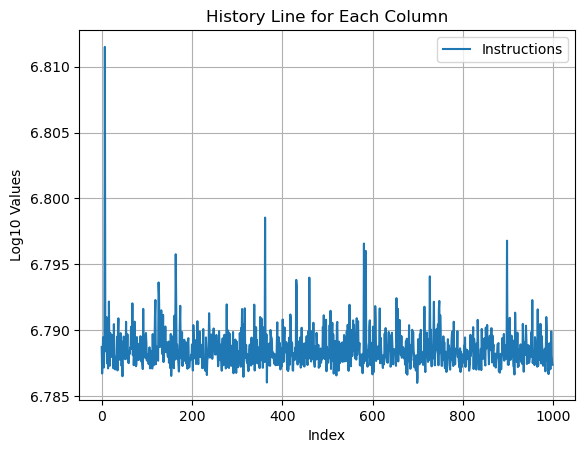

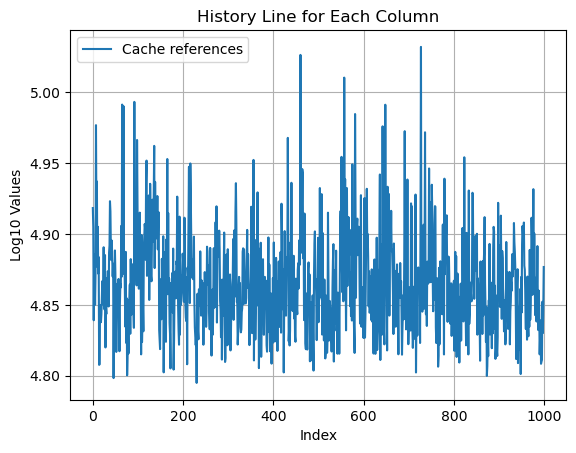

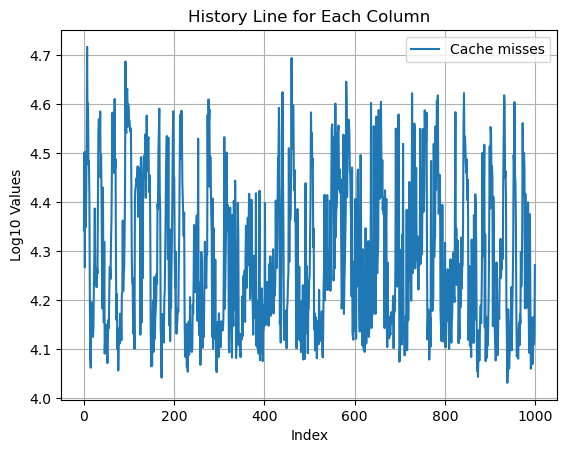

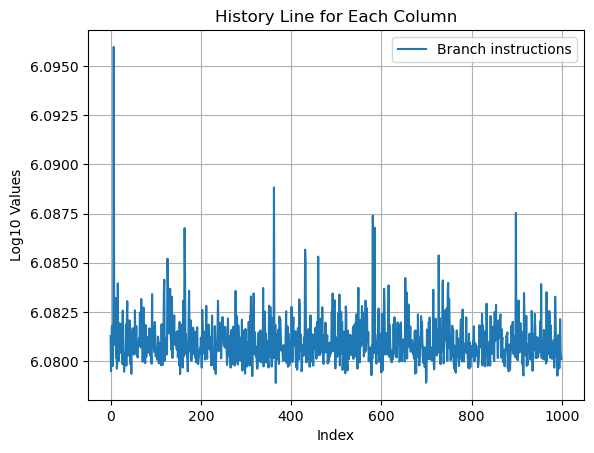

In [32]:
plt.figure(figsize=(10, 6))
for col in columns_to_plot:
    plt.plot(df.index, np.log10(df[col]), label=col.replace('-', ' ').capitalize())
    plt.title('History Line for Each Column')
    plt.xlabel('Index')
    plt.ylabel('Log10 Values')
    plt.legend()
    plt.grid(True)
    plt.show()

## Models Stats

In [42]:
model_name = "DeepSeek v2"
model_stats_path = '../../generated_programs/IA3_final_model_DeepSeekV2_Instruct_16B/model_codes.csv'
df = pd.read_csv(model_stats_path)
time_seconds = df['seconds']
length_tokens = df['length']
mean_time = time_seconds.mean()
mean_length =length_tokens.mean()

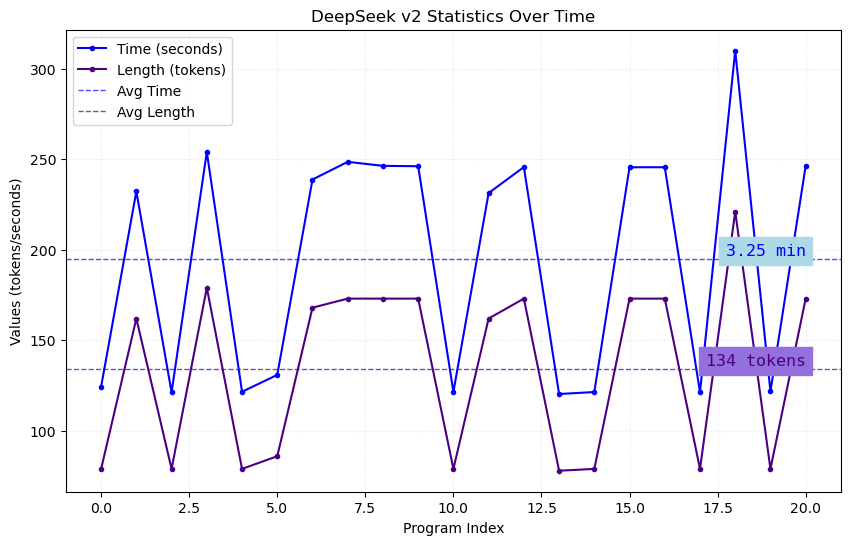

In [58]:
plt.figure(figsize=(10, 6))

plt.plot(df.index, time_seconds,marker='.', label='Time (seconds)', color='blue')
plt.plot(df.index, length_tokens,marker='.', label='Length (tokens)', color='indigo')

plt.axhline(mean_time, color='blue', linestyle='--', linewidth=1, alpha=0.7, label='Avg Time')
plt.axhline(mean_length, color='indigo', linestyle='--', linewidth=1, alpha=0.7, label='Avg Length')

plt.text(df.index[-1], mean_time, f'{mean_time/60:.2f} min', color='blue', va='bottom', ha='right', backgroundcolor='lightblue' ,fontsize=12, fontfamily='monospace')
plt.text(df.index[-1], mean_length, f'{mean_length:.0f} tokens', color='indigo', va='bottom', ha='right', backgroundcolor='mediumpurple' ,fontsize=12, fontfamily='monospace')

plt.title(f'{model_name} Statistics Over Time')
plt.xlabel('Program Index')
plt.ylabel('Values (tokens/seconds)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.3)

Todos os Programas do V2 compilaram.

Treinar com os programas do benchgen vai resultar em programas maiores, e consequentemente mais tokens e mais tempo de execução.

## Model Comparing

In [8]:
df_model_stats = pd.read_csv('../../generated_programs/modelstatus.csv')

Text(0, 0.5, 'Success Rate (%)')

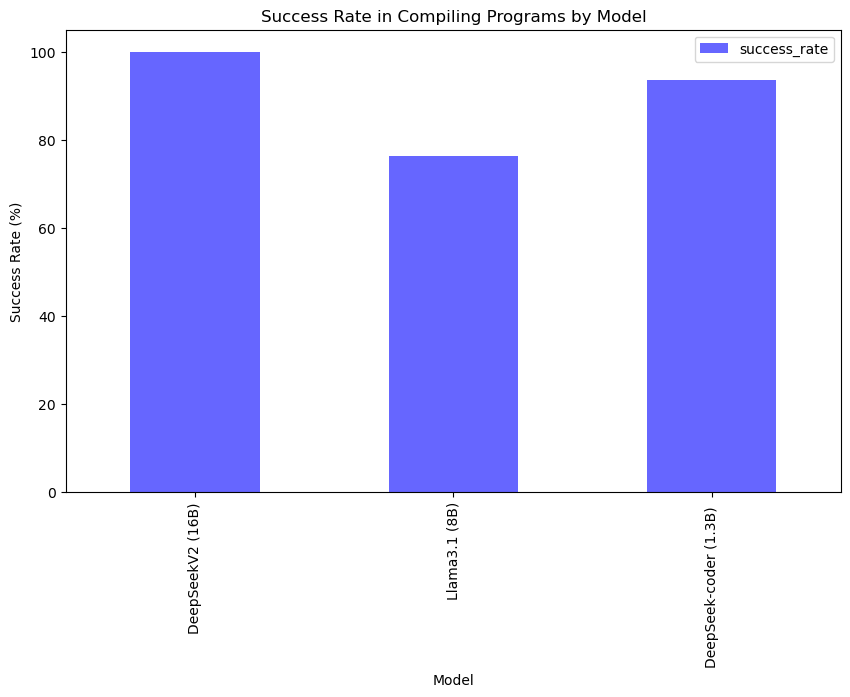

In [18]:
df_model_stats['success_rate'] = df_model_stats['compiledprograms'] / df_model_stats['totalprograms'] * 100
ax = df_model_stats.plot(x='model', y='success_rate', kind='bar', color='blue', alpha=0.6, figsize=(10, 6))
ax.set_title('Success Rate in Compiling Programs by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Success Rate (%)')

Text(0, 0.5, 'Success Rate (%)')

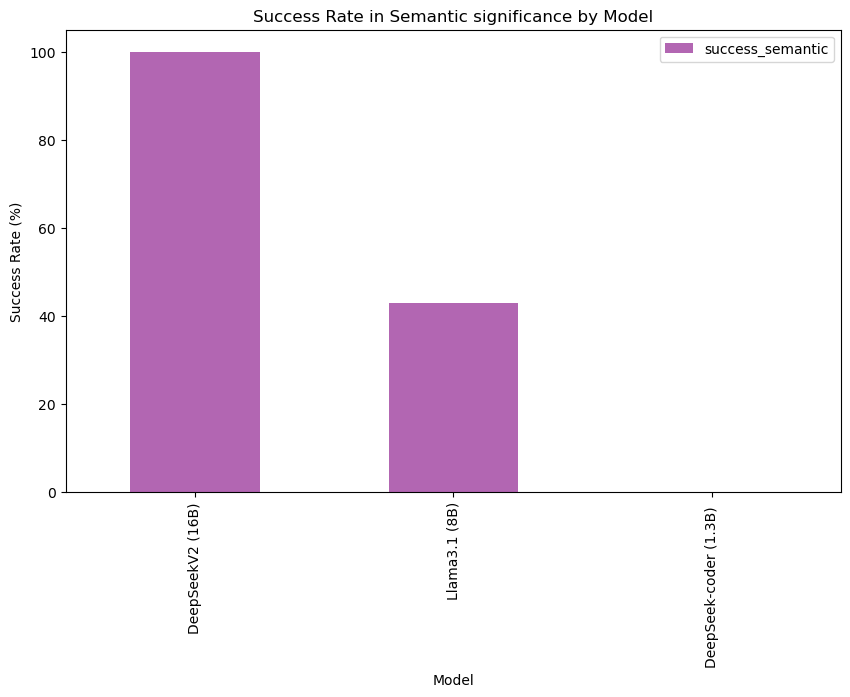

In [20]:
df_model_stats['success_semantic'] = df_model_stats['semanticOk'] / df_model_stats['totalprograms'] * 100
ax = df_model_stats.plot(x='model', y='success_semantic', kind='bar', color='purple', alpha=0.6, figsize=(10, 6))
ax.set_title('Success Rate in Semantic significance by Model')
ax.set_xlabel('Model')
ax.set_ylabel('Success Rate (%)')

In [35]:
train_df = pd.read_csv('../../generated_programs/train_references.csv')
test_df = pd.read_csv('../../generated_programs/test_references.csv')

results_dsv1 = pd.read_csv('../../generated_programs/results/dsv1.csv')
results_dsv2 = pd.read_csv('../../generated_programs/results/dsv2.csv')
results_llama3_1 = pd.read_csv('../../generated_programs/results/llama3_1.csv')

In [36]:
merge_results_dsv1 = pd.merge(train_df, results_dsv1, on='id', suffixes=('_ref','_model'))
merge_results_dsv2 = pd.merge(train_df, results_dsv2, on='id', suffixes=('_ref','_model'))
merge_results_llama3_1 = pd.merge(test_df, results_llama3_1, on='id', suffixes=('_ref','_model'))

In [37]:
merge_results_dsv1

,id,cpu-cycles_ref,instructions_ref,cache-references_ref,cache-misses_ref,branch-instructions_ref,Program,cpu-cycles_model,instructions_model,cache-references_model,cache-misses_model,branch-instructions_model
0,0,2237519,2895118,75029,20643,550369,30OQ0.out,23827720,26256661,541490,198485,5565600
1,1,1559281,1127943,72850,21998,208279,30OQ1.out,24616301,27056470,554999,221658,5662373
2,3,704682810,1531595105,1174159,175258,228970929,30OQ3.out,25874926,25701046,528609,199696,5458043
3,4,1862042,1696910,76545,29363,323580,30OQ4.out,24086855,25829669,508186,224992,5470669
4,5,1664677,1394319,69597,17063,263126,30OQ5.out,23072427,25790343,503114,152990,5461818
5,6,2245108562,4133665966,8234288,968959,798722484,30OQ6.out,23939826,25761454,479917,191930,5462831
6,7,1624115,1407247,72930,17779,265154,30OQ7.out,25108789,25961159,477906,203180,5497272
7,8,1888095,1691929,78168,22380,323195,30OQ8.out,22986574,25690066,460325,155992,5448878
8,9,1932958,1135235,92291,31200,210221,30OQ9.out,24112090,25817713,514054,198331,5476658
9,10,12253222,19848565,149897,42590,3801802,30OQ10.out,25806689,25665306,509882,234209,5448174
